<a href="https://colab.research.google.com/github/svineet239/laughing-memory/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
import matplotlib as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
y_test.shape

(10000,)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

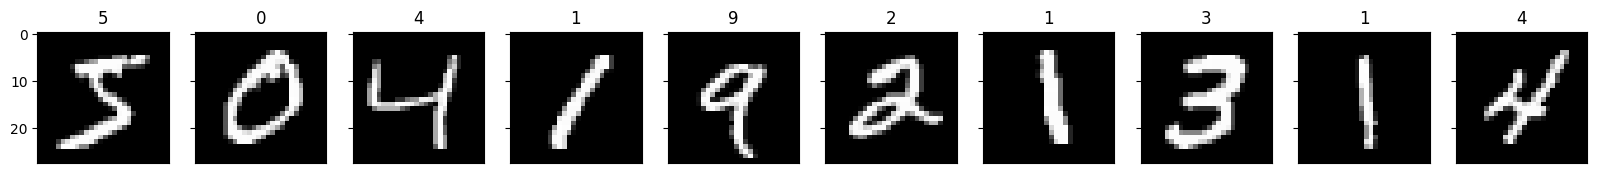

In [ ]:
import matplotlib.pyplot as plt

# Assuming len(y_train) or len(X_train) is the desired range
num_subplots = min(len(y_train), 10)

fig, axes = plt.subplots(ncols=num_subplots, sharex=False, sharey=True, figsize=(20, 4))

for i in range(num_subplots):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)

plt.show()


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                7850      
                                                                 
 dense_9 (Dense)             (None, 5)                 55        
                                                                 
 dense_10 (Dense)            (None, 10)                60        
                                                                 
Total params: 7965 (31.11 KB)
Trainable params: 7965 (31.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


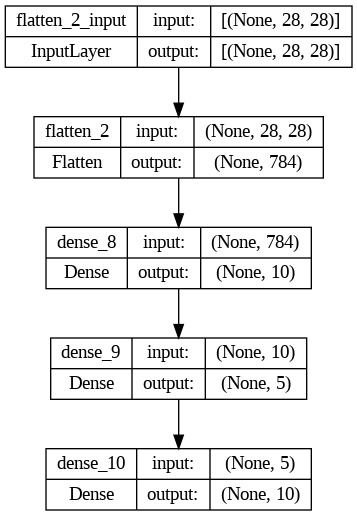

In [ ]:
utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model.fit(X_train, y_train, epochs=30,
          validation_data=(X_test,y_test))

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3969 - acc: 0.8921 - val_loss: 0.3976 - val_acc: 0.8902
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3965 - acc: 0.8888 - val_loss: 0.3868 - val_acc: 0.8958
Epoch 3/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3954 - acc: 0.8928 - val_loss: 0.3984 - val_acc: 0.8905
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4169 - acc: 0.8838 - val_loss: 0.3895 - val_acc: 0.8937
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3991 - acc: 0.8901 - val_loss: 0.3931 - val_acc: 0.8891
Epoch 6/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4143 - acc: 0.8846 - val_loss: 0.4005 - val_acc: 0.8906
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3990 - acc: 0.8880 - val_loss: 0.4093 - val_acc: 0.8869
Epoch 8/30
1875/1875 [==============================] - 5s 2m

In [ ]:
model.save('mnist_model_h5')